<a href="https://colab.research.google.com/github/nm1davi/PrimeraEntrega-Davi.ipynb/blob/main/Proyecto_PartellI_Davi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin
!pip install mlxtend 

In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

#**Introduccion:**

**Contexto empresarial**: A la hora de formar clubes, o empresas de ESPORTS 
(DEPORTES ELECTRONICOS) se tienen en cuenta distintos aspectos de los jugadores que contrartaran, alguno de ellos son, cantidad de horas jugadas en el ESPORTS en la que la empresa desea destacarse, habilidades mentales, como los reflejos, la reaccion antes la frustracion y otros. Una vez seleccionado los jugadores que se desarrollaran en competencia con otras empresas o clubes, llega la hora de en este caso, armar un equipo de futbol competitivo en el Juego FIFA 23, para competir a niven nacional o mundial.

**Problema (Planteo de Hipotesis)**: El principal problema al que se enfrentan los clubes de ESPORTS es la parte economica, porque ademas de tener que pagarles a sus jugadores por jugar para ellos y entrenar todos los dias, en este juego (FIFA) los equipos se forman apartir de cartas de jugadores o jugadoras que tienen que comprarse en un mercado de Fifa donde se paga con Fifa Points que equivale a la moneda real en forma virtual. Entonces la hipotesis que puedo plantear seria: "¿Que jugador/jugadora compramos para armar un equipo que sea competitivo?"
Esta hipotesis seria demasiada amplia para responder porque hay demasiadas variables que entran en juego, por lo tanto para achicar un poco el marjen consultamos a los jugarodes profesionales de Fifa y ellos respondieron que la pregunta seria: **¿Cuales son los jugadores que mejor media tienen en el momento actual y que expectativa hay en un futuro, respecto a esa media, es decir su potencial, respecto a su edad?** Ya que la carta se puede comprar una o mas veces, pero si ya la adquirieron en un primer momento, no hace falta que la compre cuando su precio suba respecto a que el jugador/jugadora aumento en un media.

**Contexto analítico**: Se le proporciona un archivo CSV (almacenado en la carpeta datos ya creada) que contiene detalles sobre *Jugadores de FIFA 22*:
*   **Edad** (age)
*   **Media** (overall)
*   **Potencial** (potential)
*   **Value_euro** (valor en euro)
*   **Nationality_name** (Nacionalidad)
*   **Preferred_foot** (Preferencia de Pie)


Las empresas de ESPORTS tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Que podremos responder apartir de analizar algunos gráficos:

1- ¿Cuál es el promedio de media(overall) de los jugadores de FIFA 22?

2- ¿Cómo conviene invertir  dinero en cartas, comprar jugadores mas jovenes o jugadores con mejor media?

3- ¿Que es mas costoso, un jugador joven, o un jugador de media actual elevada?

4-¿Cuál es el pie predominante entre los jugadores?

5- ¿Cuáles son los países con mayor representación en los datos?

6- ¿Cuáles son las posiciones de jugador más comunes?

7- ¿Quiénes son los jugadores mejor pagados?

8- ¿Quiénes son los mejores jugadores en general?

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from  oauth2client.client import  GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
downloaded = drive.CreateFile({"id" : "1pR7bGTeLIP6CvRVABlsy5hXSRVVl4Nvv"})
downloaded.GetContentFile("players_22.csv")

In [ ]:
df= pd.read_csv("players_22.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Feature Selection

Al comienzo trabajamos con muchos datos, lo cual es innecesario, ya que muchos de esos datos nos obstruyen, y no nos dejan trabajar comodos. Ademas que tenemos menos precision (accuracy), y nos trabaja mas lento nuetro machine learning. Por ende, solamente vamos a utilizar los datos que verdaderemente nos interesa analizar para sacar concluciones.

Al comienzo podemos ver que nos cuenta (**originalFeatures count 110**) 110 caracteristicas.

In [ ]:
originalFeatures =df.columns
print("CaracterisitcasOriginales cuenta", len(originalFeatures))
print("CaracterisitcasOriginales ", originalFeatures)
print(df.head())

In [ ]:
print(len(originalFeatures))

In [ ]:
df.info(verbose= True,show_counts=True) 

Luego de una trabajosa limpieza. Nos quedan los datos mas **relevantes**

In [ ]:
drops =["sofifa_id", "player_url","player_positions","wage_eur","dob","height_cm","weight_kg","club_team_id","club_name","league_name","league_level","club_position","club_jersey_number","club_loaned_from",
        "club_joined","club_contract_valid_until","nationality_id","nation_team_id","nation_position","nation_jersey_number","weak_foot","skill_moves","international_reputation","work_rate","body_type","real_face","release_clause_eur",
        "player_tags","player_traits","pace","shooting","passing","dribbling","defending","physic","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve",
        "skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina",
        "power_strength","power_long_shots","mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","defending_marking_awareness","defending_standing_tackle","defending_sliding_tackle",
        "goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes","goalkeeping_speed","ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm",
        "rwb","lb","lcb","cb","rcb","rb","gk","player_face_url","club_logo_url","nation_logo_url","nation_flag_url","club_flag_url"]
for drop in drops:
  df = df.drop(drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


In [ ]:
df.head()

Y vemos que pasamos de tener 8 Caracteristicas originales que son las que planteamos en nuestra **Hipotesis**. Asi trabajaremos de una manera mas **comoda** y **limpia** a la hora de visualizar datos y caracteristicas.

In [ ]:
print("CaracteristicasOriginales", len(originalFeatures), len(df.columns))
print(df.head())

In [ ]:
drops =["short_name","long_name","nationality_name","preferred_foot"]
for drop in drops:
  df = df.drop(drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

In [ ]:
X = df.drop("value_eur", 1)     
y = df['value_eur']               
df.head()

In [ ]:
X

In [ ]:
y

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


[]

**1- ¿Cuál es el promedio de media(overall) de los jugadores de FIFA 22?**

Podemos observar que la mayoria la media de casi todo los jugadores rondan entre 65 y 75, justamente por eso es más dificil y  más caro conseguri cartas de jugadores con medias altas, porque hay menos. 

Text(0.5, 0, 'Overall')

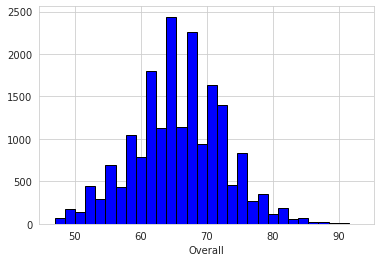

In [ ]:
plt.hist(df["overall"],30 , color="blue", ec= "black" )
# plt.title("Frequency vs. Overall", fontsize=20, verticalalignment='bottom');
plt.xlabel("Overall")
# plt.ylabel("Frequency")


**2- ¿Cómo conviene invertir  dinero en cartas, comprar jugadores mas jovenes o jugadores con mejor media?**

Podemos ver que a medida que los jugadores son mas jovenes, el potencial es mayor que su media actual, eso es porque tienen condiciones aun no desarolladas que los van llevar a subir su media actual. Por ende deberian comprar alguna carta con un potencial grande a desarollar y asegurarse que en un futuro no tendran que desembolsar mucho dinero para poder comprar esa carta con la media llegando a su potencial.

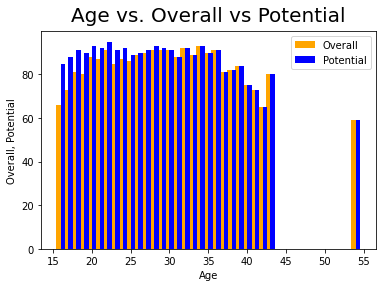

In [ ]:
x = df[("age")]
y = df[("overall")]
y1= df[("potential")]
width = 0.60
plt.bar(x-0.3, y, width, color= "orange")
plt.bar(x+0.3, y1,width, color="blue")
plt.xlabel("Age")
plt.ylabel("Overall, Potential")
plt.title("Age vs. Overall vs Potential", fontsize=20, verticalalignment='bottom');
plt.legend(["Overall", "Potential"])
plt.show()

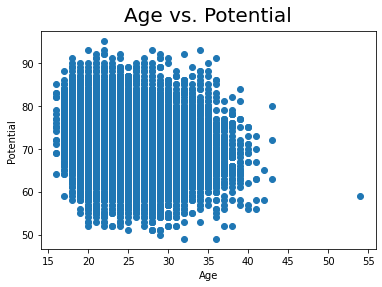

In [ ]:
plt.scatter(df['age'],df["potential"])
plt.title("Age vs. Potential", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Potential");

En el grafico de arriba, vemos que a la misma edad el los valores son mas altos porque es la prediccion a futuro que hace FIFA sobre esos jugadores. Como se van a desarrollar y a que **media** van a llegar. Ahora si vemos el grafico de abajo que es el actual, es decir la media que tienen los jugadores hoy en día, los valores son mas bajos, eso se debe a que aún no se han desarrollado al máximo.

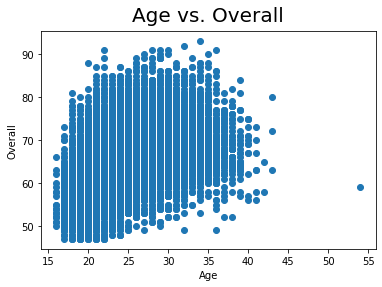

In [ ]:
plt.scatter(df['age'],df["overall"])
plt.title("Age vs. Overall", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Overall");

**3- ¿Que es mas costoso, un jugador joven, o un jugador de media actual elevada?**

Podemos observar que las cartas con mayores media (overall), son mas costosas, eso se debe a que a medida que el jugador tiene mejor media es mejor jugador, por ende cuesta más adquirirlo. Aun asi podemos concluir, que los jugadores que son mas jovenes cuestan mas, debido a que aun tienen potencial que explotar. A las empresas les  conveniene hacer un gran esfuerzo y adquirir algunas cartas de esos costos, porque en un futuro podrian venderla y hacer un gran negocio cuando esten llegando a su top de media.

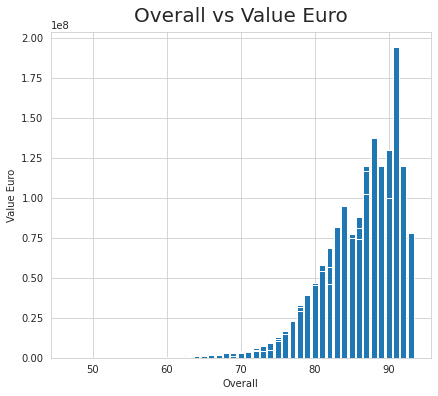

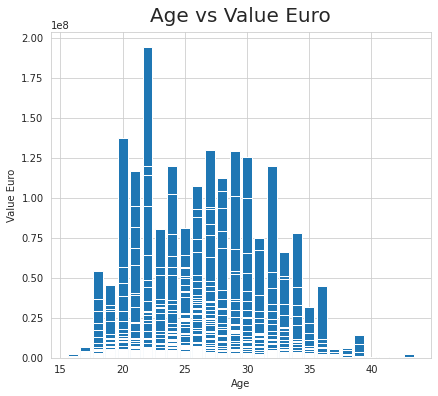

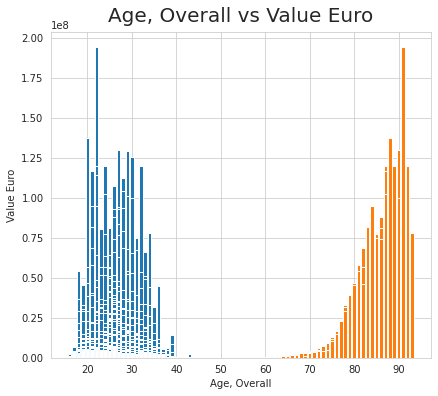

In [ ]:
# "Overall vs Value Euro"
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar(df['overall'],df["value_eur"])
plt.title("Overall vs Value Euro", fontsize=20, verticalalignment='bottom');
plt.xlabel("Overall");
plt.ylabel("Value Euro");

# "Age vs Value Euro"
plt.figure(figsize=(15,6))
plt.subplot(122)
plt.bar(df['age'],df["value_eur"])
plt.title("Age vs Value Euro", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Value Euro");

plt.figure(figsize=(15,6))
plt.subplot(122)
plt.bar(df['age'],df["value_eur"])
plt.bar(df['overall'],df["value_eur"])
plt.title("Age, Overall vs Value Euro", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age, Overall");
plt.ylabel("Value Euro");



In [ ]:
df= pd.read_csv("players_22.csv")
df1 = pd.DataFrame({'count': df.groupby(['nationality_name', 'overall']).size()})
df1
df1 = df1.reset_index()
df1.head(30)

**4-¿Cuál es el pie predominante entre los jugadores?**

Sin duda que la mayoria de los jugadores son fuerte con su pierna derecha. 



In [ ]:
df.groupby(['preferred_foot']).count()[['sofifa_id']]

In [ ]:

preferred_foot_labels = df["preferred_foot"].value_counts().index 
preferred_foot_values = df["preferred_foot"].value_counts().values 
explode = (0, 0.1) 

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%')
plt.title('Pie predominante entre los jugadores de FIFA',color = 'black',fontsize = 15)
plt.legend()
plt.show()

**5- ¿Cuáles son los países con mayor representación en los datos?**

Podemos obvservar que los paises con mayor aportes de datos (jugadores) en FIFA son:


1° Inglaterra

2° Alemania

3° España

4° Francia

5° Argentina



In [ ]:
df['nationality_name'].value_counts()

In [ ]:
from collections import Counter
bar_plot = dict(Counter(df['nationality_name'].values).most_common(5))
bar_plot

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Paises mas Populares')
plt.show()

**6- ¿Cuáles son las posiciones de jugador más comunes?**

La mayoría de los jugadores de fútbol son centrales/defensores centrales. Lo que va  ser que cueste menos conseguir defensores que delanteros o medio campistas, esto afecta a la hora de invertir dinero, ya que es mas barato siempre comprar defensores que delanteros.

In [ ]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()), color= "Red")
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
plot_most_common('player_positions')
plt.show()

**7- ¿Quiénes son los jugadores mejor pagados?**

A la hora de conseguir un jugaor, no solo hay que tener en cuenta su el valor de su pase (asi se llama en el futbol, al precio que tiene adquirir al jugador cuando juega en otro equipo y queremos traerlo al nuestro) si no que tambien el sueldo, hay que motivarlo y ofrecer algo mejor de lo que le pagan hasta el momento, por lo tanto ahora veremos quienes son los jugadores mejores pagos, para saber que monto deberiamos estar dispuestos a desembolsar si quisieramos seducir alguno de estos jugadores y traerlos a nuestro equipo. Ademas podemos ver que los jugadores con mejor media, se les paga mucho mas.

In [ ]:
# Los 10 mejores jugadores, ordenados principalmente por salarios

player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

**8- ¿Quiénes son los mejores jugadores en general?**

Si la empresa quiere ser unas de las mejores compitiendo, tiene que lograr tener los mejores jugadores en cada posicion, ahora veremos quienes son los mejores 50 jugadores, y apartir de ahi la empresa podra ver que jugador los convence para desmbolsar el dinero correspondiente y poder contar con el jugador.

In [ ]:
from numpy.ma import median
# Los 50 mejores jugadores

media = df["overall"]
nombre_jugador = df["short_name"]

data = pd.DataFrame({'short_name': nombre_jugador,'overall':media})

x = df['short_name'].head(50) 
y = df['overall'].head(50)

plt.figure(figsize=(13,20))


ax= sns.barplot(x=y, y=x, palette = 'Blues_r', orient='h')
plt.xticks()
plt.xlabel('Media', size = 20) 
plt.ylabel('Nombre del Jugador', size = 20 ) 
plt.title('FIFA22 Top 50 (Rating de Media)')

plt.show()

## Algoritmo De Regresion OLS

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
edad = df["age"]
media = df["overall"]
potencial = df["potential"]
valor_en_euro= df["value_eur"]
salario = df["wage_eur"]

data = pd.DataFrame({"age":edad, 'overall':media, "potential":potencial, "value_eur":valor_en_euro, "wage_eur":salario})

data.head(10)

In [ ]:
sns.set(style='ticks', color_codes=True)
Visual = sns.pairplot(data)

# overall= 64.3309+5.014*value_eur


64.33 ordenada al origen, si el valor del jugador fuera menos que 0, es decir estubiera en condiciones de jugador libre.


Por cada 1 euro que aumenta el valor del jugador, aumenta un porcentaje casi nulo, en la media del jugador, habria que aumentar mucho el valor en euros para que su media aumente mucho tambien. Es decir podemos ver que es proporcional pero se necesita de un aumento muy grande en el **valor en euro** para mover su **media**.

In [ ]:
model1 = 'overall~value_eur' 
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())


# overall= 64.14+0.7283*potential


64.14 ordenada al origen, si no tiene potencial a desarollar, queda en 64.14 su media


Por cada 1 en atributo que aumenta el potencial del jugador, aumenta un 0.74, en la media del jugador, Esto quiere decir que en algunos jugadores tomara mas tiempo llegar a su media final esperada, porque los atributos aumentan en funcion del tiempo y los entrenamientos. Y algunos jugadores aumentan sus atributos mucho mas rapidos que otros, esos son los que la empresa tiene que tratar de contratar lo antes posible.

In [ ]:
model2 = 'overall~potential' 
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

**Comentario:**

Ambos modelos de regresion, yo los veo que tienen sentidos, pero veo que no son del todo preciso, de echo ninguno de los dos tienen una precision del mas del 50%. Por lo tanto me gustaria buscar mas precision con mayor conocimiento sobre el tema, y algunas herramientas que me ayuden con esto

In [ ]:
model1 = 'age~potential+overall'
lm1   = sm.ols(formula = model1, data = data).fit()
print(lm1.summary())

# edad = 29.4556-0.7472* potential+0.7429 *overall

La edad del jugador es de 29 el que menos overall y media tiene (si tiene 0 de ambos) esto quiere decir que los jugadores a los 29, dejan de aumentar su media. Su Potencial llega al maximo a esa edad aproximadamente, eso es logico porque los jugadores generalmente se retiran entre los 33 y 36 años.

Y ademas la funcion nos demuestra que a medidad que disminuye el potencial, aumenta la media, es logico porque el potencial va siendo cada vez menos a medida que la media aumenta debido a que la media consume ese potencial.

Mateo, me falta lo de

por medio de las métricas generadas si se puede tener una situación de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora.

No puedo hacerlo porque no se como crear la matriz de train y test con mis datos, ya que algunos son Nan, y no se como sacarlos. 

Por favor si podrias ayudarme. Gracias y saludos codrdiales.

